In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
data = pd.read_csv('feature_time_48k_2048_load_1.csv')

In [26]:
data

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


In [27]:
data['fault'].unique()

array(['Ball_007_1', 'Ball_014_1', 'Ball_021_1', 'IR_007_1', 'IR_014_1',
       'IR_021_1', 'OR_007_6_1', 'OR_014_6_1', 'OR_021_6_1', 'Normal_1'],
      dtype=object)

In [28]:
data['fault']=data['fault'].map({'Ball_007_1':0, 'Ball_014_1':1, 'Ball_021_1':2, 'IR_007_1':3, 'IR_014_1':4,
       'IR_021_1':5, 'OR_007_6_1':6, 'OR_014_6_1':7, 'OR_021_6_1':8, 'Normal_1':9})

In [29]:
labels = data['fault']
data = data.drop(['fault'],axis=1)
data

,max,min,mean,sd,rms,skewness,kurtosis,crest,form
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085
...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672


In [30]:
col = data.columns
for i in col:
    data[col] = (data[col] - data[col].min())/(data[col].max() - data[col].min())

In [31]:
data

,max,min,mean,sd,rms,skewness,kurtosis,crest,form
0,0.030375,0.957817,0.415334,0.053118,0.052659,0.451912,0.024418,0.074054,0.011173
1,0.046550,0.967241,0.540955,0.061254,0.061281,0.588352,0.023157,0.164838,0.008221
2,0.046674,0.954688,0.490173,0.075587,0.075249,0.525842,0.016984,0.105475,0.012546
3,0.064099,0.937576,0.504101,0.081781,0.081452,0.496251,0.030090,0.197493,0.013131
4,0.043420,0.931725,0.538466,0.066015,0.065974,0.469143,0.038686,0.119669,0.009114
...,...,...,...,...,...,...,...,...,...
2295,0.008540,0.993776,0.214101,0.004142,0.003276,0.408214,0.021946,0.135854,0.008218
2296,0.009353,0.992075,0.281456,0.007945,0.007376,0.478553,0.016309,0.111824,0.005916
2297,0.007601,0.990883,0.265392,0.006671,0.006035,0.435078,0.023482,0.096612,0.006275
2298,0.008540,0.989591,0.266423,0.006408,0.005781,0.354958,0.026530,0.113140,0.006147


In [32]:
data['max'].min()

0.0

In [33]:
from keras.utils import to_categorical
labels = np.asarray(labels)
labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [35]:
labels = to_categorical(labels)
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [36]:
data = np.asarray(data)

In [37]:
data

array([[0.03037519, 0.95781736, 0.41533428, ..., 0.02441798, 0.07405438,
        0.01117271],
       [0.0465495 , 0.9672411 , 0.54095496, ..., 0.02315702, 0.16483845,
        0.00822145],
       [0.04667396, 0.95468807, 0.49017259, ..., 0.01698431, 0.10547484,
        0.01254599],
       ...,
       [0.0076013 , 0.99088282, 0.2653922 , ..., 0.02348221, 0.09661248,
        0.006275  ],
       [0.00854002, 0.98959132, 0.26642336, ..., 0.02653031, 0.11313973,
        0.00614728],
       [0.00581831, 0.98581464, 0.25507982, ..., 0.03302719, 0.09646897,
        0.00576927]])

In [53]:
idx = np.random.permutation(len(data))
data , labels = data[idx], labels[idx]

In [38]:
def get_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(acc)+1)
    
    plt.plot(epochs,acc,'bo',label = 'Training acc')
    plt.plot(epochs,val_acc,'b',label = 'Validation acc')
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs,loss,'bo',label='Training Loss')
    plt.plot(epochs,val_loss,'b',label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()

In [62]:
from keras import layers,models

def get_model():
    m = models.Sequential()
    m.add(layers.Dense(27,activation='relu',input_shape=(9,)))
    m.add(layers.Dense(18,activation='relu',input_shape=(9,)))
    m.add(layers.Dense(10,activation='softmax'))
    m.compile(optimizer = 'RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return m

Epoch 1/75
58/58 [==============================] - 1s 4ms/step - loss: 2.1588 - accuracy: 0.2707 - val_loss: 2.0344 - val_accuracy: 0.4043
Epoch 2/75
58/58 [==============================] - 0s 2ms/step - loss: 1.9308 - accuracy: 0.3962 - val_loss: 1.8324 - val_accuracy: 0.3739
Epoch 3/75
58/58 [==============================] - 0s 1ms/step - loss: 1.7369 - accuracy: 0.4391 - val_loss: 1.6415 - val_accuracy: 0.5217
Epoch 4/75
58/58 [==============================] - 0s 2ms/step - loss: 1.5693 - accuracy: 0.5571 - val_loss: 1.4759 - val_accuracy: 0.5370
Epoch 5/75
58/58 [==============================] - 0s 1ms/step - loss: 1.4112 - accuracy: 0.6158 - val_loss: 1.3216 - val_accuracy: 0.7239
Epoch 6/75
58/58 [==============================] - 0s 1ms/step - loss: 1.2574 - accuracy: 0.7565 - val_loss: 1.1625 - val_accuracy: 0.7783
Epoch 7/75
58/58 [==============================] - 0s 2ms/step - loss: 1.1144 - accuracy: 0.8304 - val_loss: 1.0324 - val_accuracy: 0.8522
Epoch 8/75
58/58 [==

58/58 [==============================] - 0s 1ms/step - loss: 0.1601 - accuracy: 0.9500 - val_loss: 0.1547 - val_accuracy: 0.9674
Epoch 60/75
58/58 [==============================] - 0s 1ms/step - loss: 0.1580 - accuracy: 0.9533 - val_loss: 0.1545 - val_accuracy: 0.9609
Epoch 61/75
58/58 [==============================] - 0s 1ms/step - loss: 0.1586 - accuracy: 0.9554 - val_loss: 0.1595 - val_accuracy: 0.9522
Epoch 62/75
58/58 [==============================] - 0s 1ms/step - loss: 0.1585 - accuracy: 0.9533 - val_loss: 0.1463 - val_accuracy: 0.9652
Epoch 63/75
58/58 [==============================] - 0s 1ms/step - loss: 0.1580 - accuracy: 0.9560 - val_loss: 0.1437 - val_accuracy: 0.9587
Epoch 64/75
58/58 [==============================] - 0s 1ms/step - loss: 0.1567 - accuracy: 0.9516 - val_loss: 0.1485 - val_accuracy: 0.9587
Epoch 65/75
58/58 [==============================] - 0s 1ms/step - loss: 0.1555 - accuracy: 0.9554 - val_loss: 0.1461 - val_accuracy: 0.9630
Epoch 66/75
58/58 [======

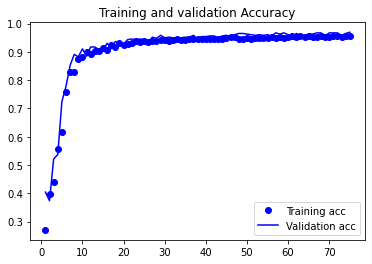

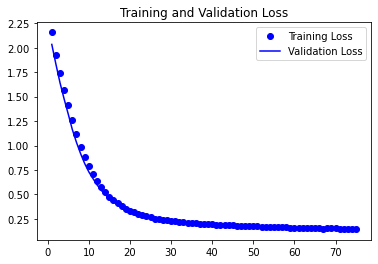

<Figure size 432x288 with 0 Axes>

In [64]:
temp_model = get_model()
history = temp_model.fit(data,labels,epochs=75,validation_split=0.2)
get_curves(history)